In [1]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

from sklearn.model_selection import GridSearchCV


In [2]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Edureka/MP_1/mid_term_project_dataset/train.csv', header=0)
train_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Edureka/MP_1/mid_term_project_dataset/train_label.csv', header=None)
val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Edureka/MP_1/mid_term_project_dataset/test.csv', header=0)
val_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Edureka/MP_1/mid_term_project_dataset/test_label.csv', header=None)

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [4]:
train.shape

(8708, 9)

In [5]:
train_label.head()

,0
0,504
1,5
2,139
3,209
4,184


In [6]:
train_label.shape

(8708, 1)

In [7]:
val.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [8]:
val.shape

(2178, 9)

In [9]:
val_label.head()

,0
0,256
1,87
2,11
3,84
4,668


In [10]:
val_label.shape

(2178, 1)

In [11]:
train['Total_booking'] = train_label[0]

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [13]:
train.shape

(8708, 10)

In [14]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       8708 non-null   object 
 1   season         8708 non-null   object 
 2   holiday        8708 non-null   int64  
 3   workingday     8708 non-null   int64  
 4   weather        8708 non-null   object 
 5   temp           8708 non-null   float64
 6   atemp          8708 non-null   float64
 7   humidity       8708 non-null   int64  
 8   windspeed      8708 non-null   float64
 9   Total_booking  8708 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB


In [16]:
train.nunique()

datetime         8708
season              4
holiday             2
workingday          2
weather             4
temp               49
atemp              60
humidity           88
windspeed          28
Total_booking     797
dtype: int64

We have 8708 rows of training data, unique data, different types of data types are included

In [17]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [18]:
train.isna()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8703,False,False,False,False,False,False,False,False,False,False
8704,False,False,False,False,False,False,False,False,False,False
8705,False,False,False,False,False,False,False,False,False,False
8706,False,False,False,False,False,False,False,False,False,False


In [19]:
train.isna().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

No null values present in the training dataset

In [20]:
val.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [21]:
val_label.isna().sum()

0    0
dtype: int64

no null values present in validation data as well


In [22]:
train['datetime']

0         5/2/2012 19:00
1          9/5/2012 4:00
2         1/13/2011 9:00
3       11/18/2011 16:00
4        9/13/2011 13:00
              ...       
8703      1/16/2012 6:00
8704     11/10/2011 1:00
8705      4/12/2011 3:00
8706      11/7/2012 1:00
8707     1/10/2011 10:00
Name: datetime, Length: 8708, dtype: object

In [23]:
train['datetime'] =pd.to_datetime(train.datetime)

In [24]:
val['datetime']=pd.to_datetime(val.datetime)

In [25]:
train['s_year']=train.datetime.dt.year
train['s_month']= train.datetime.dt.month_name()
train['s_day']= train.datetime.dt.day
train['s_hour']= train.datetime.dt.hour
train['s_week_day']= train.datetime.dt.day_name()

In [26]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,s_year,s_month,s_day,s_hour,s_week_day
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012,May,2,19,Wednesday
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012,September,5,4,Wednesday
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011,January,13,9,Thursday
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011,November,18,16,Friday
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011,September,13,13,Tuesday


In [27]:
train.drop(columns='datetime', inplace=True)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         8708 non-null   object 
 1   holiday        8708 non-null   int64  
 2   workingday     8708 non-null   int64  
 3   weather        8708 non-null   object 
 4   temp           8708 non-null   float64
 5   atemp          8708 non-null   float64
 6   humidity       8708 non-null   int64  
 7   windspeed      8708 non-null   float64
 8   Total_booking  8708 non-null   int64  
 9   s_year         8708 non-null   int64  
 10  s_month        8708 non-null   object 
 11  s_day          8708 non-null   int64  
 12  s_hour         8708 non-null   int64  
 13  s_week_day     8708 non-null   object 
dtypes: float64(3), int64(7), object(4)
memory usage: 952.6+ KB


In [29]:
val['s_year']=val.datetime.dt.year
val['s_month']= val.datetime.dt.month_name()
val['s_day']= val.datetime.dt.day
val['s_hour']= val.datetime.dt.hour
val['s_week_day']= val.datetime.dt.day_name()

In [30]:
val.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,s_year,s_month,s_day,s_hour,s_week_day
0,2012-05-10 11:00:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,2012,May,10,11,Thursday
1,2012-06-09 07:00:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,2012,June,9,7,Saturday
2,2011-03-06 20:00:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,2011,March,6,20,Sunday
3,2011-10-13 11:00:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,2011,October,13,11,Thursday
4,2012-06-02 12:00:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,2012,June,2,12,Saturday


In [31]:
val.drop(columns='datetime', inplace=True)

In [32]:
train[['season','holiday','workingday','s_week_day']]=train[['season','holiday','workingday','s_week_day']].astype('category')

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   season         8708 non-null   category
 1   holiday        8708 non-null   category
 2   workingday     8708 non-null   category
 3   weather        8708 non-null   object  
 4   temp           8708 non-null   float64 
 5   atemp          8708 non-null   float64 
 6   humidity       8708 non-null   int64   
 7   windspeed      8708 non-null   float64 
 8   Total_booking  8708 non-null   int64   
 9   s_year         8708 non-null   int64   
 10  s_month        8708 non-null   object  
 11  s_day          8708 non-null   int64   
 12  s_hour         8708 non-null   int64   
 13  s_week_day     8708 non-null   category
dtypes: category(4), float64(3), int64(5), object(2)
memory usage: 715.2+ KB


In [34]:
val[['season','holiday','workingday','s_week_day']]=val[['season','holiday','workingday','s_week_day']].astype('category')

In [35]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      2178 non-null   category
 1   holiday     2178 non-null   category
 2   workingday  2178 non-null   category
 3   weather     2178 non-null   object  
 4   temp        2178 non-null   float64 
 5   atemp       2178 non-null   float64 
 6   humidity    2178 non-null   int64   
 7   windspeed   2178 non-null   float64 
 8   s_year      2178 non-null   int64   
 9   s_month     2178 non-null   object  
 10  s_day       2178 non-null   int64   
 11  s_hour      2178 non-null   int64   
 12  s_week_day  2178 non-null   category
dtypes: category(4), float64(3), int64(4), object(2)
memory usage: 162.6+ KB


In [36]:
train[train.duplicated()]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,s_year,s_month,s_day,s_hour,s_week_day


In [37]:
val[val.duplicated()]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,s_year,s_month,s_day,s_hour,s_week_day


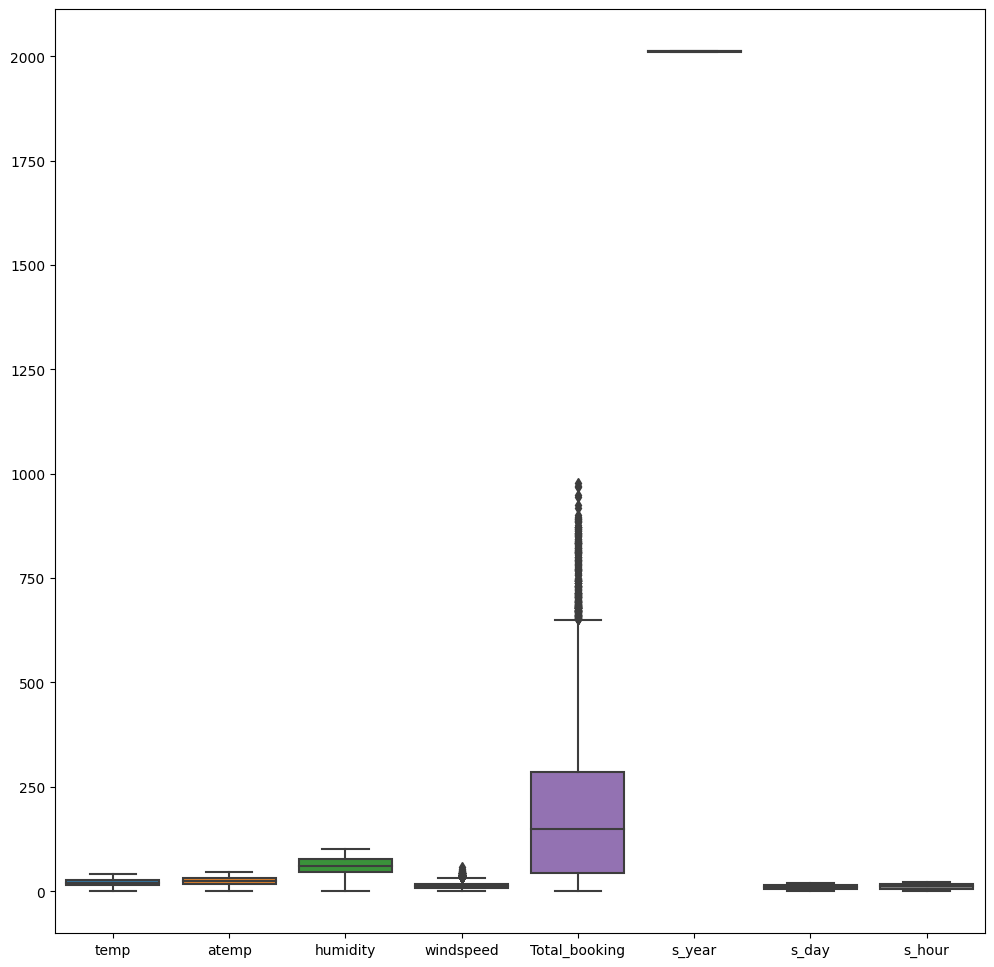

<Figure size 640x480 with 0 Axes>

In [38]:
fig,ax = plt.subplots(figsize=(12, 12))
sns.boxplot(data=train,ax=ax)
plt.show()
plt.clf()

temp, Atemp, humidity columns has no outliers

windspeed and total_booking has outliers

<Axes: xlabel='windspeed'>

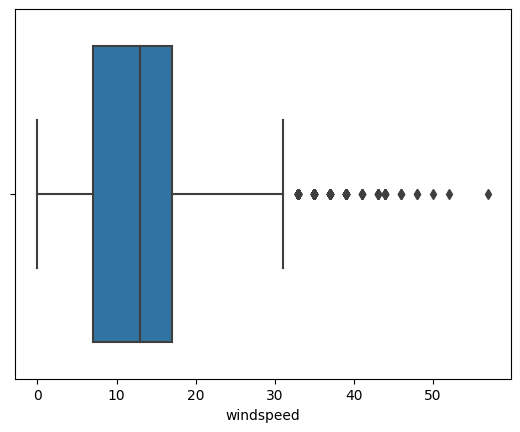

In [39]:
sns.boxplot(data=train, x ='windspeed')

windspeed has outliers, need to go for IQR for further analysis

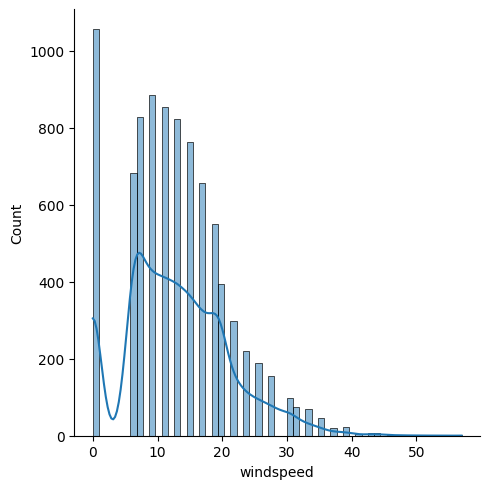

In [40]:
sns.displot(data=train,x='windspeed',kde=True)

<Axes: xlabel='Total_booking'>

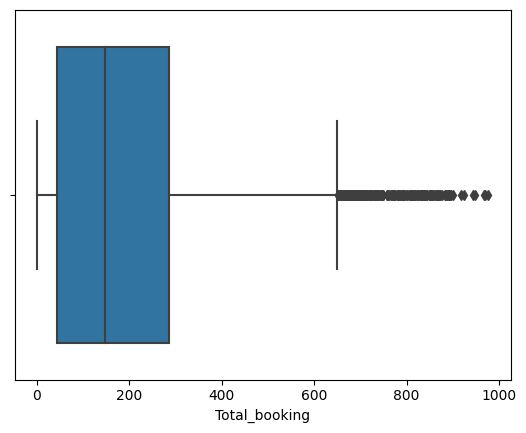

In [41]:
sns.boxplot(data=train, x ='Total_booking')

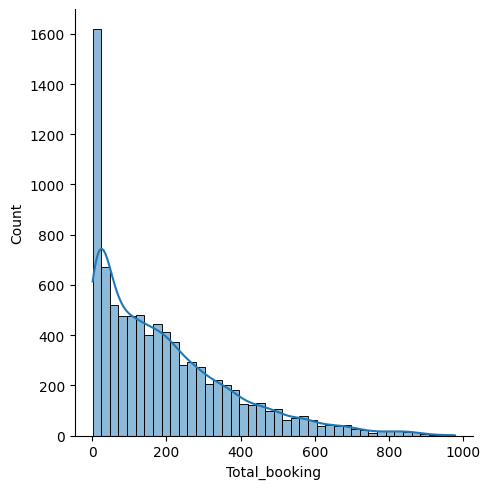

In [42]:
sns.displot(data=train,x='Total_booking',kde=True)

In [43]:
q1_w = train['windspeed'].quantile(.25)
q3_w = train['windspeed'].quantile(.75)
iqr_w = q3_w-q1_w
upf_w = q3_w+(1.5*iqr_w)
lpf_w = q1_w-(1.5*iqr_w)
print("upper range", upf_w)
print("lower range", lpf_w)
# Create arrays of Boolean values indicating the outlier rows
upper_w = np.where(train['windspeed']>=upf_w)[0]
lower_w = np.where(train['windspeed']<=lpf_w)[0]
print("Upper range in Windspeed is", upper_w)
print("Lower Range in Windspeed is", lower_w)

# # Removing the outliers
# train.drop(index=upper_w, inplace=True)
# train.drop(index=lower_w, inplace=True)

# # Print the new shape of the DataFrame
# print("New Shape: ", train.shape)

upper range 31.992500000000003
lower range -7.993100000000002
Upper range in Windspeed is [  10   32   86  105  182  218  271  279  288  316  317  344  431  539
  575  687  700  722  762  838  877  881  946  970  971 1014 1202 1217
 1219 1238 1297 1357 1372 1415 1441 1446 1489 1750 1831 1919 1922 1999
 2037 2062 2065 2176 2178 2184 2200 2231 2430 2598 2629 2701 2714 2771
 2800 2825 2905 2918 2943 3049 3109 3225 3338 3374 3389 3471 3489 3595
 3599 3656 3755 3762 3799 3800 3907 3915 3923 3948 3990 3996 4076 4112
 4202 4310 4333 4369 4443 4458 4489 4530 4662 4668 4730 4808 4826 4887
 4891 4915 4931 5035 5040 5065 5073 5125 5150 5215 5272 5355 5359 5397
 5439 5485 5489 5494 5502 5531 5624 5650 5699 5703 5705 5897 5917 5930
 5982 5998 6038 6040 6080 6143 6175 6188 6221 6265 6273 6322 6609 6639
 6711 6719 6720 6744 6759 6768 6777 6820 6844 6857 6925 6963 6977 6984
 7065 7087 7126 7292 7341 7381 7415 7462 7512 7575 7617 7677 7731 7772
 7809 7906 8060 8270 8394 8399 8435 8460 8468 8496 8555 85

In [44]:
q1_booking = train['Total_booking'].quantile(.25)
q3_booking = train['Total_booking'].quantile(.75)
iqr_booking = q3_booking-q1_booking
upf_booking = q3_booking+(1.5*iqr_booking)
lpf_booking = q1_booking-(1.5*iqr_booking)
print("upper range", upf_booking)
print("lower range", lpf_booking)
# Create arrays of Boolean values indicating the outlier rows
upper_b = np.where(train['Total_booking']>=upf_booking)[0]
lower_b = np.where(train['Total_booking']<=lpf_booking)[0]
print("Upper Range in Total Booking is",upper_b)
print("Lower Range in Total Booking is", lower_b)


upper range 650.5
lower range -321.5
Upper Range in Total Booking is [   5   27   30   52   70   82  105  112  125  133  156  157  159  239
  257  325  343  510  565  566  605  625  727  768  891  956  991 1008
 1019 1030 1162 1180 1200 1202 1243 1279 1293 1295 1312 1324 1336 1375
 1413 1561 1571 1589 1591 1601 1606 1616 1675 1744 1791 1799 1809 1823
 1851 1878 1883 1894 1952 2023 2085 2108 2116 2126 2179 2225 2485 2491
 2550 2612 2637 2648 2649 2663 2686 2706 2732 2749 2771 2793 2811 2863
 2867 2878 2883 2907 2963 2976 2999 3037 3048 3055 3080 3099 3101 3226
 3323 3441 3444 3488 3523 3548 3646 3656 3679 3684 3733 3808 3816 3846
 3905 3919 3938 3967 4018 4038 4148 4171 4179 4183 4191 4204 4211 4250
 4325 4392 4395 4417 4434 4572 4576 4730 4764 4765 4766 4773 4798 4841
 4853 4956 4976 4980 4987 5017 5152 5164 5167 5247 5265 5316 5339 5342
 5362 5363 5380 5471 5537 5587 5608 5634 5651 5653 5665 5685 5731 5745
 5841 5862 5872 5888 5890 5914 5958 6009 6070 6194 6230 6252 6311 6314
 6347 63

In [45]:
outliers = np.concatenate([upper_w,upper_b])
outliers.sort()
print(outliers)

[   5   10   27   30   32   52   70   82   86  105  105  112  125  133
  156  157  159  182  218  239  257  271  279  288  316  317  325  343
  344  431  510  539  565  566  575  605  625  687  700  722  727  762
  768  838  877  881  891  946  956  970  971  991 1008 1014 1019 1030
 1162 1180 1200 1202 1202 1217 1219 1238 1243 1279 1293 1295 1297 1312
 1324 1336 1357 1372 1375 1413 1415 1441 1446 1489 1561 1571 1589 1591
 1601 1606 1616 1675 1744 1750 1791 1799 1809 1823 1831 1851 1878 1883
 1894 1919 1922 1952 1999 2023 2037 2062 2065 2085 2108 2116 2126 2176
 2178 2179 2184 2200 2225 2231 2430 2485 2491 2550 2598 2612 2629 2637
 2648 2649 2663 2686 2701 2706 2714 2732 2749 2771 2771 2793 2800 2811
 2825 2863 2867 2878 2883 2905 2907 2918 2943 2963 2976 2999 3037 3048
 3049 3055 3080 3099 3101 3109 3225 3226 3323 3338 3374 3389 3441 3444
 3471 3488 3489 3523 3548 3595 3599 3646 3656 3656 3679 3684 3733 3755
 3762 3799 3800 3808 3816 3846 3905 3907 3915 3919 3923 3938 3948 3967
 3990 

In [46]:
# Removing the outliers
train.drop(index=outliers, inplace=True)


# # Print the new shape of the DataFrame
print("New Shape: ", train.shape)

New Shape:  (8291, 14)


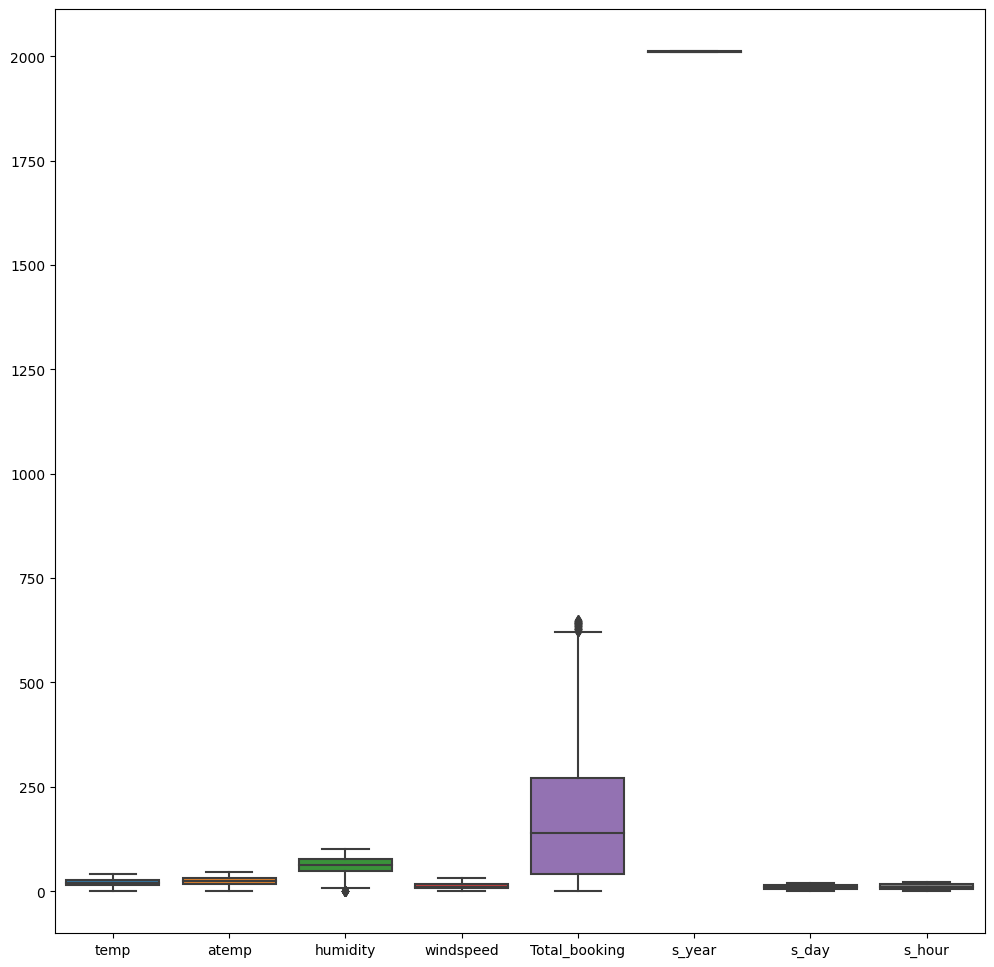

<Figure size 640x480 with 0 Axes>

In [47]:
fig,ax = plt.subplots(figsize=(12, 12))
sns.boxplot(data=train,ax=ax)
plt.show()
plt.clf()

In [48]:

# Z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(train['Total_booking']))
print(z)


threshold = 3

# Position of the outlier

outlier_bookings =np.where(z > 3)[0]
print(outlier_bookings)
print(len(outlier_bookings))


# Removing the outliers
train.drop(index=outlier_bookings, inplace=True)


# # Print the new shape of the DataFrame
print("New Shape: ", train.shape)

0       2.085446
1       1.098094
2       0.243196
3       0.203393
4       0.043897
          ...   
8703    1.047055
8704    1.059815
8705    1.123614
8706    0.543048
8707    0.932218
Name: Total_booking, Length: 8291, dtype: float64
[1070 2177]
2
New Shape:  (8289, 14)


In [49]:
# Z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(train['Total_booking']))
print(z)


threshold = 2

# Position of the outlier

outlier_bookings =np.where(z > 2)[0]
print(outlier_bookings)
print(len(outlier_bookings))

0       2.085204
1       1.098329
2       0.243432
3       0.203155
4       0.043660
          ...   
8703    1.047291
8704    1.060050
8705    1.123848
8706    0.543284
8707    0.932454
Name: Total_booking, Length: 8289, dtype: float64
[   0   14   18   34   45   50   61   71   84  139  181  204  222  225
  266  269  337  375  379  386  399  408  441  463  469  480  503  510
  520  521  527  559  586  593  594  609  651  653  687  704  705  721
  725  744  753  756  769  776  816  824  827  833  840  867  874  875
  876  888  899  934  942  955  964  968  983 1003 1051 1069 1095 1119
 1143 1157 1193 1223 1224 1252 1256 1257 1263 1270 1279 1280 1290 1300
 1306 1317 1323 1331 1339 1341 1387 1396 1400 1403 1404 1405 1421 1429
 1449 1460 1472 1514 1535 1537 1539 1540 1579 1595 1596 1601 1624 1629
 1693 1712 1714 1740 1746 1767 1780 1795 1804 1806 1827 1837 1856 1949
 1953 1960 1987 2003 2022 2026 2035 2043 2060 2072 2073 2087 2099 2112
 2136 2175 2182 2212 2215 2222 2279 2280 2282 2286 23

Threshold 2 is taking off huge values, would like to limit the outlier to threshold =3 only.

<Axes: xlabel='Total_booking'>

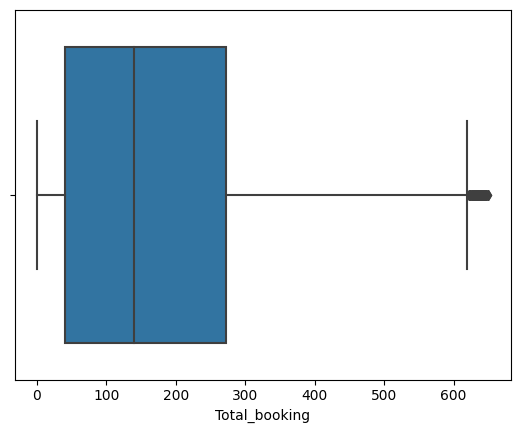

In [50]:
sns.boxplot(data=train, x ='Total_booking')

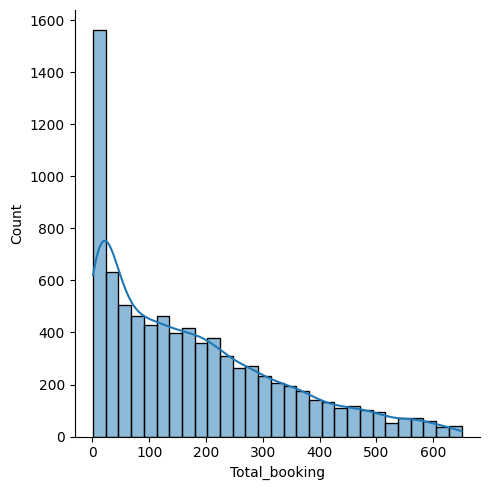

In [51]:
sns.displot(data=train,x='Total_booking',kde=True)

The probability distribution of the Total_booking column is left skewed.

In [52]:
total_b = train.Total_booking
from scipy.stats import shapiro
shapiro(total_b)[1]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

<ipython-input-53-809741b79f6c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sq_total_booking)


<Axes: xlabel='Total_booking', ylabel='Density'>

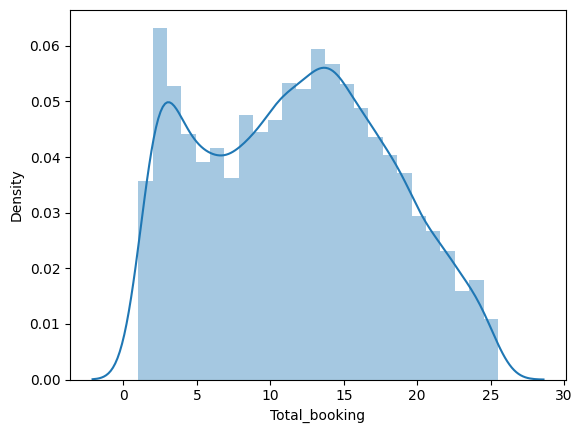

In [53]:
sq_total_booking = total_b**(.5)

sns.distplot(sq_total_booking)

<ipython-input-54-8d1c7e7faa88>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_b_recip)


<Axes: xlabel='Total_booking', ylabel='Density'>

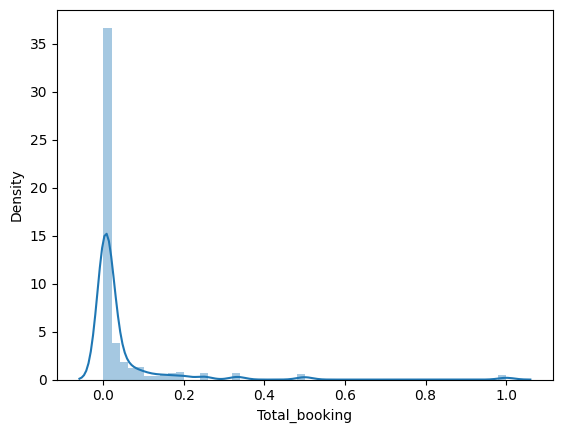

In [54]:
total_b_recip = 1/total_b
sns.distplot(total_b_recip)

<ipython-input-55-53b54365c7c0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_Total_booking)


<Axes: xlabel='Total_booking', ylabel='Density'>

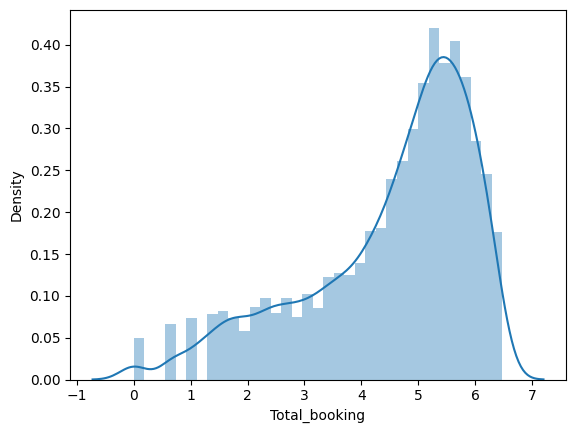

In [55]:
log_Total_booking = np.log(total_b)
sns.distplot(log_Total_booking)

from above transformations found sq_total_booking is better over other transformation methods to normally distribute the data.

In [56]:
train['Sq_Total_booking']=sq_total_booking

In [57]:
train.drop(columns='Total_booking', inplace=True)

In [58]:
train.s_year.unique()

array([2012, 2011])

In [59]:
val.s_year.unique()

array([2012, 2011])

In [60]:
train.drop(columns='s_day', inplace=True)
val.drop(columns='s_day', inplace=True)

removing s_day as is already available in the form of holiday and workingday

As year column has only 2 unique features it can be easilly encoded

In [61]:
month_to_quarter = {'January': 'Q1', 'February': 'Q1', 'March': 'Q1', 'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
                    'July': 'Q3', 'August': 'Q3', 'September': 'Q3', 'October': 'Q4', 'November': 'Q4', 'December': 'Q4'}

# Create a new column with the quarter buckets
train['s_quarter'] = train['s_month'].map(month_to_quarter)
val['s_quarter'] = val['s_month'].map(month_to_quarter)



In [62]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,s_year,s_month,s_hour,s_week_day,Sq_Total_booking,s_quarter
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,2012,May,19,Wednesday,22.449944,Q2
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,2012,September,4,Wednesday,2.236068,Q3
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,2011,January,9,Thursday,11.789826,Q1
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,2011,November,16,Friday,14.456832,Q4
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,2011,September,13,Tuesday,13.564660,Q3


In [63]:
train.drop(columns='s_month', inplace=True)
val.drop(columns='s_month', inplace=True)

In [64]:

# Define the mapping of hours to buckets
hour_to_bucket = {
    0: 'Late Night',
    1: 'Late Night',
    2: 'Late Night',
    3: 'Late Night',
    4: 'Early Morning',
    5: 'Early Morning',
    6: 'Early Morning',
    7: 'Morning',
    8: 'Morning',
    9: 'Morning',
    10: 'Morning',
    11: 'Morning',
    12: 'Afternoon',
    13: 'Afternoon',
    14: 'Afternoon',
    15: 'Afternoon',
    16: 'Afternoon',
    17: 'Afternoon',
    18: 'Evening',
    19: 'Evening',
    20: 'Evening',
    21: 'Night',
    22: 'Night',
    23: 'Night'
}

# Create a new column with the hour-based buckets
train['s_hour_bucket'] = train['s_hour'].map(hour_to_bucket)
val['s_hour_bucket'] = val['s_hour'].map(hour_to_bucket)

In [65]:
train.drop(columns='s_hour', inplace=True)
val.drop(columns='s_hour', inplace=True)

In [66]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,s_year,s_week_day,Sq_Total_booking,s_quarter,s_hour_bucket
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,2012,Wednesday,22.449944,Q2,Evening
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,2012,Wednesday,2.236068,Q3,Early Morning
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,2011,Thursday,11.789826,Q1,Morning
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,2011,Friday,14.456832,Q4,Afternoon
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,2011,Tuesday,13.564660,Q3,Afternoon


In [67]:
val.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,s_year,s_week_day,s_quarter,s_hour_bucket
0,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,2012,Thursday,Q2,Morning
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,2012,Saturday,Q2,Morning
2,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,2011,Sunday,Q1,Evening
3,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,2011,Thursday,Q4,Morning
4,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,2012,Saturday,Q2,Afternoon


As year has 2 unique fields only will be going for one hot encoding for it
s_day will be dropped as i have that information already in holiday & working day
s_month, s_hour can be converted into buckets for one-hot encoding.


label: season, weather, s_month,s_week_day

one hot: season, weather, s_year, s_month(buckets), s_hour(bucket), s_week_day

no change: holiday, workingday, temp, atemp, humidity, windspeed, Total_booking

remove: s_day

In [68]:
num_features = ['temp', 'atemp', 'humidity', 'windspeed']
corr = train[num_features].corr()
corr

,temp,atemp,humidity,windspeed
temp,1.000000,0.985350,-0.059417,-0.012672
atemp,0.985350,1.000000,-0.039434,-0.052279
humidity,-0.059417,-0.039434,1.000000,-0.302120
windspeed,-0.012672,-0.052279,-0.302120,1.000000


<Axes: >

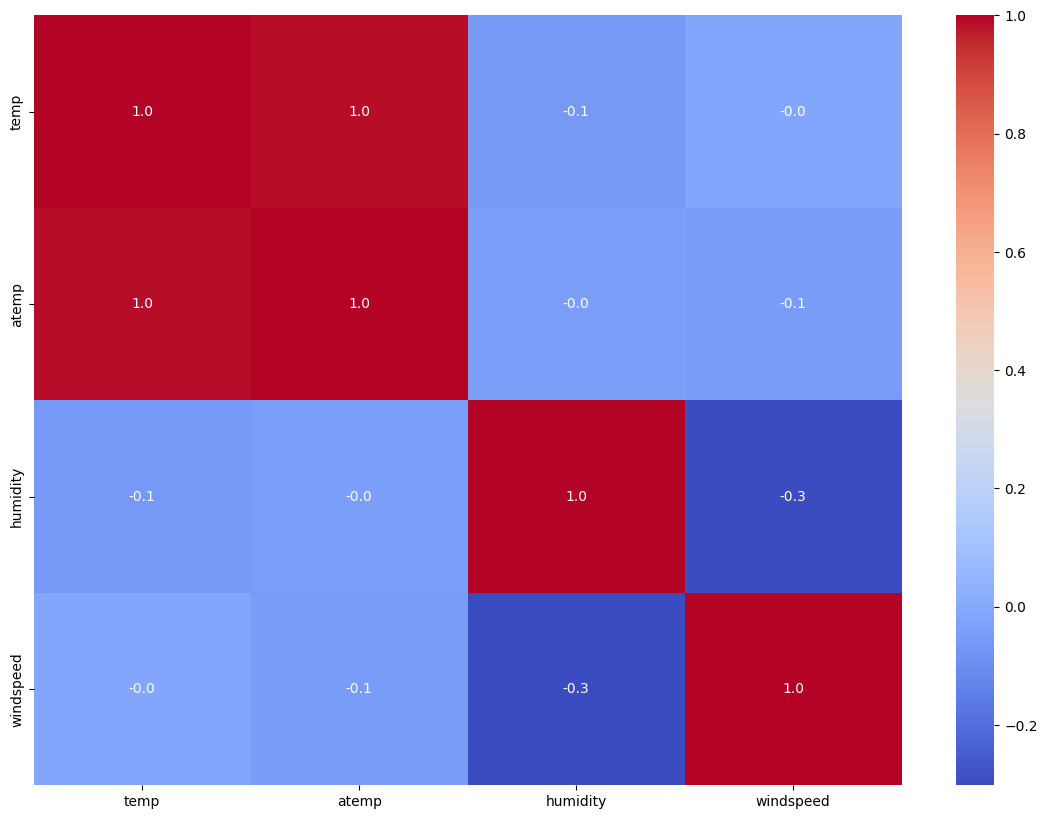

In [69]:
num_features = ['temp', 'atemp', 'humidity', 'windspeed']
corr = train[num_features].corr()
plt.figure(figsize = (14,10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
            fmt =".1f",
            xticklabels = corr.columns,
            yticklabels = corr.columns)

Temp and ATeamp are highly correlated
so We can remove one feature

In [70]:
train.drop(columns='atemp', inplace=True)
val.drop(columns='atemp', inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

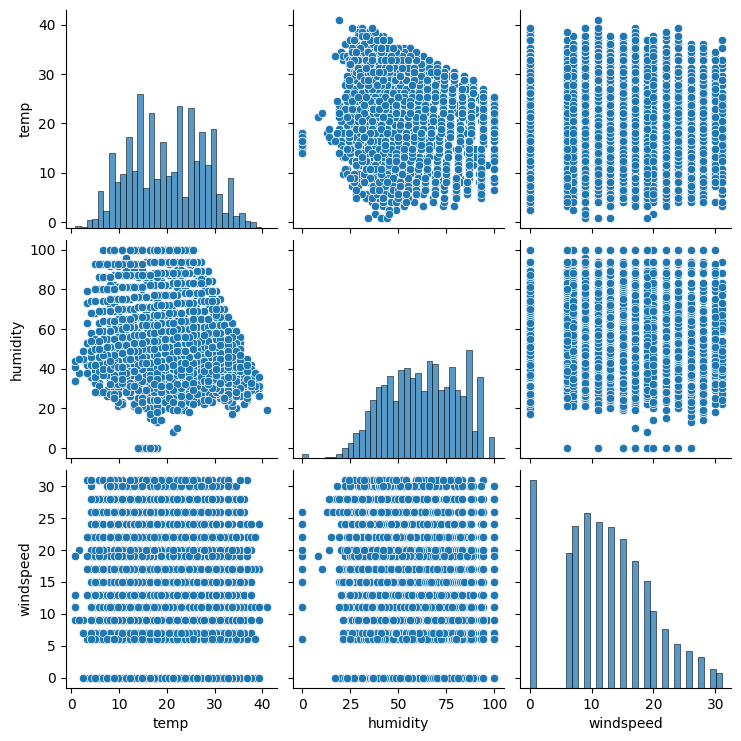

In [71]:
num_features = ['temp', 'humidity', 'windspeed']

sns.pairplot(train[num_features])
plt.show

can observe no strong correlation now

<ipython-input-72-ae81de3e6ded>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(x="s_quarter", y = "Sq_Total_booking", data =train, ci=0, color ="RED", estimator = 'sum')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

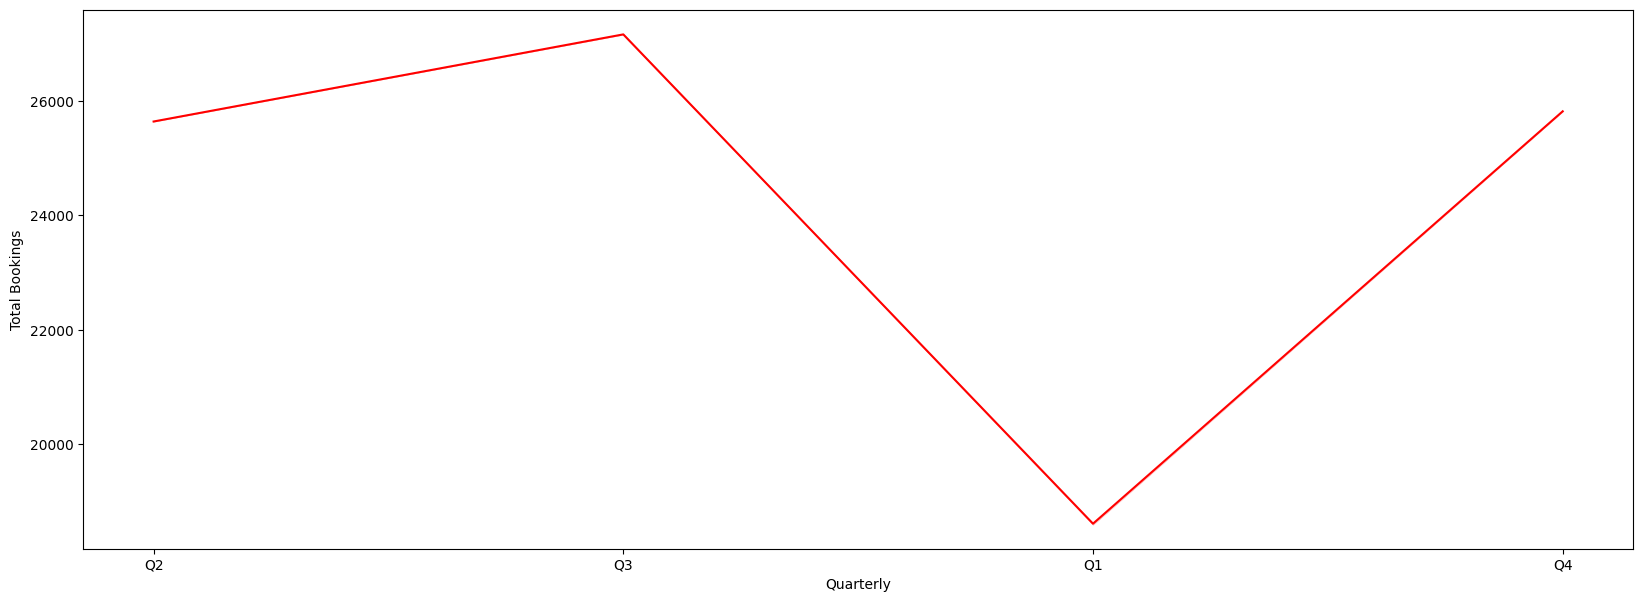

In [72]:
cat_val = train.s_quarter.unique().tolist()
train.s_quarter = pd.Categorical(train.s_quarter, ordered = True, categories = cat_val)
plt.figure(figsize = (20,7))
sns.lineplot(x="s_quarter", y = "Sq_Total_booking", data =train, ci=0, color ="RED", estimator = 'sum')
plt.ylabel('Total Bookings')
plt.xlabel('Quarterly')
plt

Except Q1 the sales are good in Q2,Q3,Q4

<ipython-input-73-d4ef3b9ff27b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(x="s_hour_bucket", y = "Sq_Total_booking", data =train, ci=0, color ="RED", estimator = 'sum')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

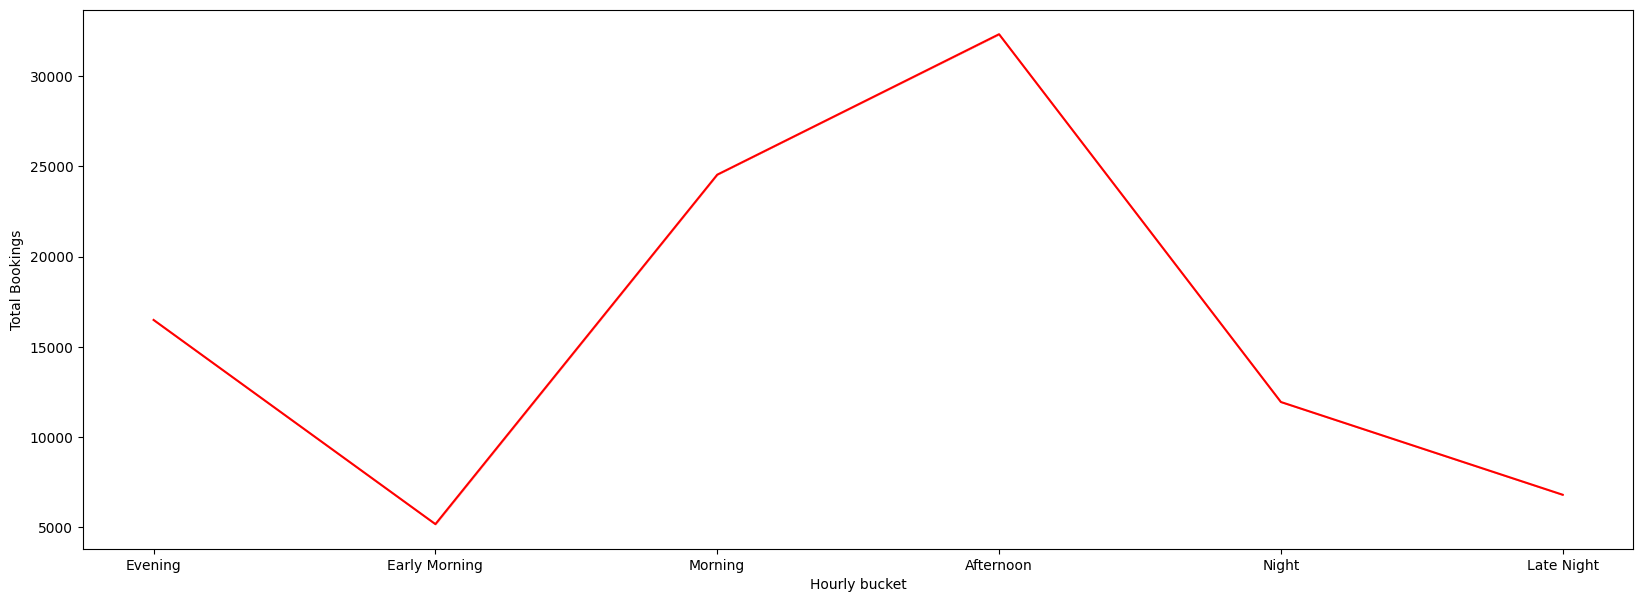

In [73]:

plt.figure(figsize = (20,7))
sns.lineplot(x="s_hour_bucket", y = "Sq_Total_booking", data =train, ci=0, color ="RED", estimator = 'sum')
plt.ylabel('Total Bookings')
plt.xlabel('Hourly bucket')
plt

observed good sales in Afternoon only

<ipython-input-74-b78aa2b1350c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(x="s_week_day", y = "Sq_Total_booking", data =train, ci=0, color ="RED", estimator = 'sum')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

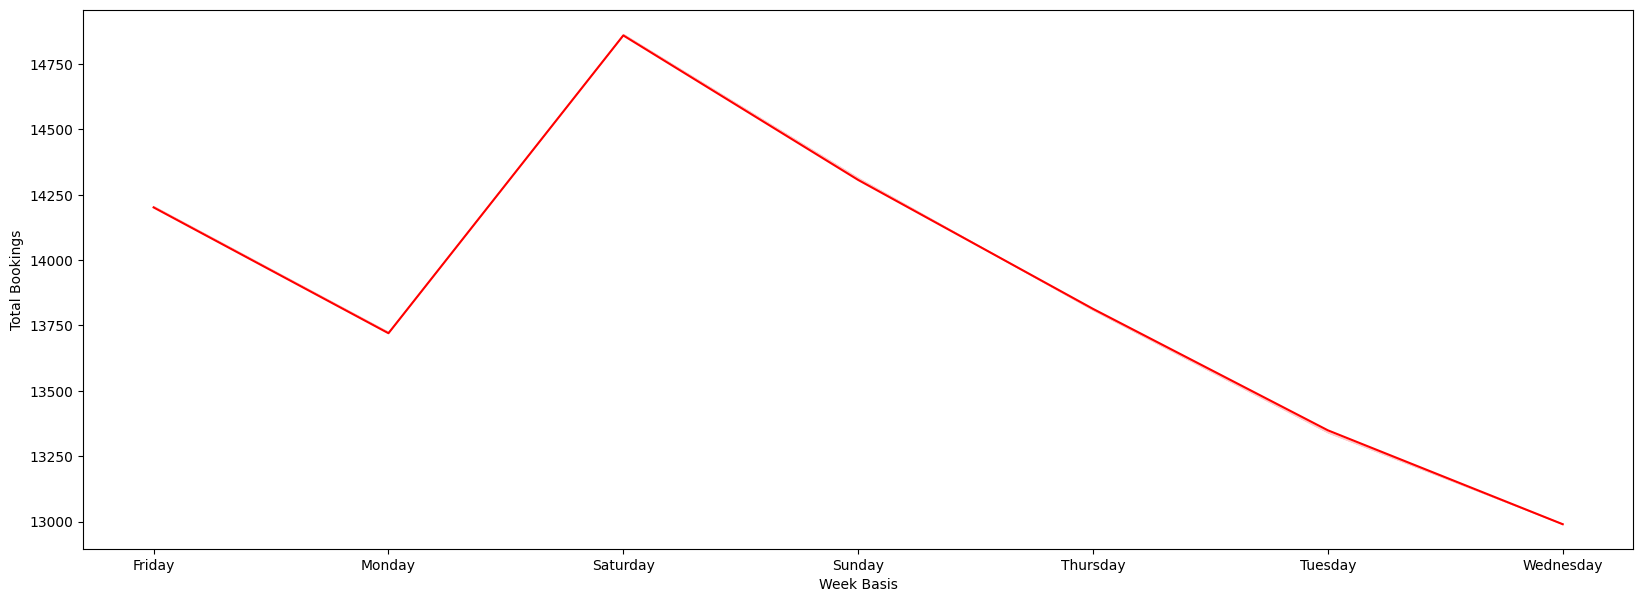

In [74]:

plt.figure(figsize = (20,7))
sns.lineplot(x="s_week_day", y = "Sq_Total_booking", data =train, ci=0, color ="RED", estimator = 'sum')
plt.ylabel('Total Bookings')
plt.xlabel('Week Basis')
plt

We seea good sale on Saturday.


<ipython-input-75-81988717ac31>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(x="season", y = "Sq_Total_booking", data =train, ci=0, color ="RED", estimator = 'sum')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

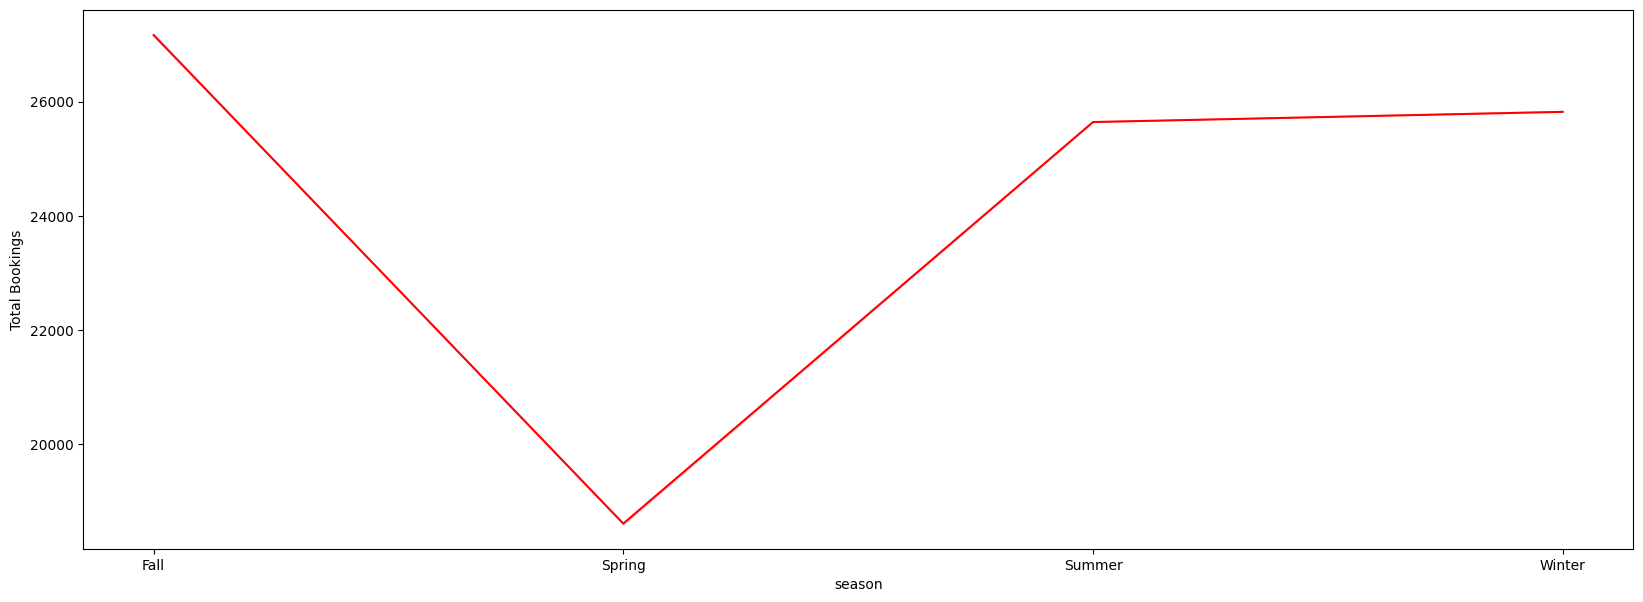

In [75]:

plt.figure(figsize = (20,7))
sns.lineplot(x="season", y = "Sq_Total_booking", data =train, ci=0, color ="RED", estimator = 'sum')
plt.ylabel('Total Bookings')
plt.xlabel('season')
plt

Observed fall in sales in winter


In [76]:
# LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the categorical data
train["weather"] = label_encoder.fit_transform(train["weather"])
train["s_quarter"] = label_encoder.fit_transform(train["s_quarter"])


In [77]:
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,s_year,s_week_day,Sq_Total_booking,s_quarter,s_hour_bucket
0,Summer,0,1,0,22.14,77,16.9979,2012,Wednesday,22.449944,1,Evening
1,Fall,0,1,0,28.70,79,19.0012,2012,Wednesday,2.236068,2,Early Morning
2,Spring,0,1,0,5.74,50,22.0028,2011,Thursday,11.789826,0,Morning
3,Winter,0,1,0,13.94,29,8.9981,2011,Friday,14.456832,3,Afternoon
4,Fall,0,1,0,30.34,51,19.0012,2011,Tuesday,13.564660,2,Afternoon


In [78]:
train.weather.unique()

array([0, 2, 3, 1])

In [79]:

# Fit and transform the categorical data
val["weather"] = label_encoder.fit_transform(val["weather"])
val["s_quarter"] = label_encoder.fit_transform(val["s_quarter"])


In [80]:
val.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,s_year,s_week_day,s_quarter,s_hour_bucket
0,Summer,0,1,0,21.32,48,35.0008,2012,Thursday,1,Morning
1,Summer,0,0,0,23.78,64,7.0015,2012,Saturday,1,Morning
2,Spring,0,0,1,11.48,100,27.9993,2011,Sunday,0,Evening
3,Winter,0,1,2,25.42,83,0.0000,2011,Thursday,3,Morning
4,Summer,0,0,0,25.42,43,23.9994,2012,Saturday,1,Afternoon


In [81]:
val.weather.unique()

array([0, 1, 2])

In [82]:
get_dummies = ["season", "weather", "s_year", "s_quarter", "s_hour_bucket", "s_week_day"]


train = pd.get_dummies(train, columns=get_dummies)

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8289 entries, 0 to 8707
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   holiday                      8289 non-null   category
 1   workingday                   8289 non-null   category
 2   temp                         8289 non-null   float64 
 3   humidity                     8289 non-null   int64   
 4   windspeed                    8289 non-null   float64 
 5   Sq_Total_booking             8289 non-null   float64 
 6   season_Fall                  8289 non-null   uint8   
 7   season_Spring                8289 non-null   uint8   
 8   season_Summer                8289 non-null   uint8   
 9   season_Winter                8289 non-null   uint8   
 10  weather_0                    8289 non-null   uint8   
 11  weather_1                    8289 non-null   uint8   
 12  weather_2                    8289 non-null   uint8   
 13  wea

In [84]:
columns_to_drop = ['season_Spring','weather_3','s_year_2011','s_quarter_0','s_hour_bucket_Early Morning','s_week_day_Monday']

# Drop the specified columns
train.drop(columns=columns_to_drop, inplace=True)

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8289 entries, 0 to 8707
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   holiday                   8289 non-null   category
 1   workingday                8289 non-null   category
 2   temp                      8289 non-null   float64 
 3   humidity                  8289 non-null   int64   
 4   windspeed                 8289 non-null   float64 
 5   Sq_Total_booking          8289 non-null   float64 
 6   season_Fall               8289 non-null   uint8   
 7   season_Summer             8289 non-null   uint8   
 8   season_Winter             8289 non-null   uint8   
 9   weather_0                 8289 non-null   uint8   
 10  weather_1                 8289 non-null   uint8   
 11  weather_2                 8289 non-null   uint8   
 12  s_year_2012               8289 non-null   uint8   
 13  s_quarter_1               8289 non-null   uint8 

In [86]:
val = pd.get_dummies(val, columns=get_dummies)

In [87]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   holiday                      2178 non-null   category
 1   workingday                   2178 non-null   category
 2   temp                         2178 non-null   float64 
 3   humidity                     2178 non-null   int64   
 4   windspeed                    2178 non-null   float64 
 5   season_Fall                  2178 non-null   uint8   
 6   season_Spring                2178 non-null   uint8   
 7   season_Summer                2178 non-null   uint8   
 8   season_Winter                2178 non-null   uint8   
 9   weather_0                    2178 non-null   uint8   
 10  weather_1                    2178 non-null   uint8   
 11  weather_2                    2178 non-null   uint8   
 12  s_year_2011                  2178 non-null   uint8   
 13  s_y

In [88]:
columns_to_drop = ['season_Spring','s_year_2011','s_quarter_0','s_hour_bucket_Early Morning','s_week_day_Monday']

# Drop the specified columns
val.drop(columns=columns_to_drop, inplace=True)

In [89]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   holiday                   2178 non-null   category
 1   workingday                2178 non-null   category
 2   temp                      2178 non-null   float64 
 3   humidity                  2178 non-null   int64   
 4   windspeed                 2178 non-null   float64 
 5   season_Fall               2178 non-null   uint8   
 6   season_Summer             2178 non-null   uint8   
 7   season_Winter             2178 non-null   uint8   
 8   weather_0                 2178 non-null   uint8   
 9   weather_1                 2178 non-null   uint8   
 10  weather_2                 2178 non-null   uint8   
 11  s_year_2012               2178 non-null   uint8   
 12  s_quarter_1               2178 non-null   uint8   
 13  s_quarter_2               2178 non-null   uint8 

In [90]:
x = train.drop(columns='Sq_Total_booking')
y =train['Sq_Total_booking']

In [91]:
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state =33)

In [92]:
X_train[:5]

,holiday,workingday,temp,humidity,windspeed,season_Fall,season_Summer,season_Winter,weather_0,weather_1,...,s_hour_bucket_Evening,s_hour_bucket_Late Night,s_hour_bucket_Morning,s_hour_bucket_Night,s_week_day_Friday,s_week_day_Saturday,s_week_day_Sunday,s_week_day_Thursday,s_week_day_Tuesday,s_week_day_Wednesday
5664,0,1,22.14,68,15.0013,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4770,0,1,30.34,57,11.0014,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6133,0,0,26.24,89,19.0012,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
6742,0,1,29.52,66,11.0014,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3716,0,1,11.48,65,15.0013,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [93]:
X_train.shape, y_train.shape

((6631, 26), (6631,))

In [94]:
 X_test.shape, y_test.shape

((1658, 26), (1658,))

In [95]:

# Creating a Random Forest Regressor instance
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to your data
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

In [96]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse_rf_regressor = np.sqrt(mse)

print("Root Mean Squared Error:", rmse_rf_regressor)

Root Mean Squared Error: 2.8671105501294214


In [97]:

# Create an AdaBoost Regressor instance
ada_regressor = AdaBoostRegressor(n_estimators=100, random_state=42)

# Fit the regressor to your data
ada_regressor.fit(X_train, y_train)

# Make predictions
y_pred = ada_regressor.predict(X_test)

In [98]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse_ada_regressor = np.sqrt(mse)

print("Root Mean Squared Error:", rmse_ada_regressor)

Root Mean Squared Error: 3.8229235310790024


In [99]:
# Create a base regressor (e.g., Decision Tree Regressor)
base_regressor = DecisionTreeRegressor()

# Create a Bagging Regressor instance
bagging_regressor = BaggingRegressor(base_regressor, n_estimators=100, random_state=42)

# Fit the regressor to your data
bagging_regressor.fit(X_train, y_train)

# Make predictions
y_pred = bagging_regressor.predict(X_test)

In [100]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse_bagging_regressor = np.sqrt(mse)

print("Root Mean Squared Error:", rmse_bagging_regressor)

Root Mean Squared Error: 2.8666232965455842


In [101]:
# Create an SVR instance
svr_regressor = SVR(kernel='linear')  #Can choose different kernels: linear, polynomial, radial basis function (rbf)

# Fit the SVR model to your data
svr_regressor.fit(X_train, y_train)

# Make predictions
y_pred = svr_regressor.predict(X_test)


In [102]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse_svr_regressor = np.sqrt(mse)

print("Root Mean Squared Error:", rmse_svr_regressor)

Root Mean Squared Error: 3.431413091976696


In [103]:
# Create a KNeighborsRegressor instance
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the k-NN model to your data
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

In [104]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse_knn_regressor = np.sqrt(mse)

print("Root Mean Squared Error:", rmse_svr_regressor)

Root Mean Squared Error: 3.431413091976696


In [105]:
models = ['Random Forest Regressor', 'Ada Boost Regressor', 'Bagging Regressor', 'SVR', 'K-Neighbours Regressor']

rmse_values = [ rmse_rf_regressor,rmse_ada_regressor, rmse_bagging_regressor, rmse_svr_regressor,rmse_knn_regressor]

print(rmse_values)

[2.8671105501294214, 3.8229235310790024, 2.8666232965455842, 3.431413091976696, 5.220091445888361]


<Figure size 2000x2000 with 0 Axes>

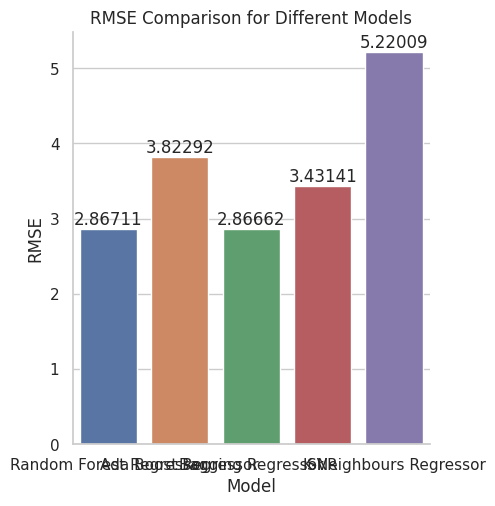

In [106]:
data = {'Model': models, 'RMSE': rmse_values}
df = pd.DataFrame(data)
sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))
cat_plot = sns.catplot(x='Model', y='RMSE', data=df, kind='bar')
for ax in cat_plot.axes.flat:
  ax.bar_label(ax.containers[0])
cat_plot.set(title='RMSE Comparison for Different Models')
plt.show()

can clearly identify that Random Forest is my best model with least RMSE
AS Random Forest Regresor and Bagging Regressor are so close with RMSE values, lets apply Grid Search CV for both

Lets apply Grid Search on Random Forest Regressor and Bagging Regressor


In [107]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Printing the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 8.035195008931565


In [108]:
# Make predictions
y_pred = grid_search.predict(X_test)

In [109]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse_grid_search = np.sqrt(mse)

print("Root Mean Squared Error:", rmse_grid_search)

Root Mean Squared Error: 2.7819606355240287


In [110]:
# Make predictions
y_val_pred = grid_search.predict(val) #val_label is the actual value

In [111]:
msle = mean_squared_log_error(val_label, y_val_pred)

print("Mean Squared Logarithmic Error:", msle)

Mean Squared Logarithmic Error: 5.552912460582433


In [112]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 0.7, 0.9]
}

# Creating GridSearchCV instance
grid_search1 = GridSearchCV(estimator=bagging_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


# Fit the grid search to your data
grid_search1.fit(X_train, y_train)

# Printing the best parameters and best score
print("Best Parameters:", grid_search1.best_params_)
print("Best Score:", -grid_search1.best_score_)

Best Parameters: {'max_samples': 0.5, 'n_estimators': 150}
Best Score: 8.249794591499116


In [113]:
# Make predictions
y_pred1 = grid_search1.predict(X_test)

In [114]:
# Calculate mean squared error
mse1 = mean_squared_error(y_test, y_pred1)

# Calculate RMSE
rmse_grid_search1 = np.sqrt(mse1)

print("Root Mean Squared Error:", rmse_grid_search1)

Root Mean Squared Error: 2.8020767366899086


In [115]:
# Make predictions
y_val_pred = grid_search1.predict(val) #val_label is the actual value

In [116]:
msle1 = mean_squared_log_error(val_label, y_val_pred)

print("Mean Squared Logarithmic Error:", msle1)

Mean Squared Logarithmic Error: 5.555020793112146


Mean Squared Logarithmic Error of Rarndom Search Regressor is: 5.552912460582433

Mean Squared Logarithmic Error of Bagging Regressor is: 5.555020793112146

As Random Forest Regresor resulted with less Mean Squared Logarithmic Error

Would declare Random Forest Regresor as my best model with parameters {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}